<a href="https://colab.research.google.com/github/marcinwolter/Machine-learning-KISD-2023/blob/main/lecture7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>




#**<font color = "red">Introduction to machine learning</font>**

**Lecture 7**


##**<font color = "green">Transfer learning</font>**
##**<font color = "green">Reinforcement learning</font>**
##**<font color = "green">Autoencoder</font>**

*19 April 2023*


---

*Marcin Wolter, IFJ PAN*

*e-mail: marcin.wolter@ifj.edu.pl*


---
</center>

#<font color='green'>**Program for today:**

* ###  <font color='red'>Transfer learning: using pretrained networks.
* ###  <font color='red'>Reinforcement learning: how to train a robot?
* ###  <font color='red'>Autoencoder: like PCA, but not linear 

<br>


**As always all slides are here:** 

*https://github.com/marcinwolter/Machine-learning-KISD-2023*

<br>




# **Ideas about your projects???**

# <font color='green'> **Transfer learning**

The reuse of a previously learned model on a new problem is known as transfer learning. It’s particularly popular in deep learning right now since it can train deep neural networks with a small amount of data.

<img src = 'https://editor.analyticsvidhya.com/uploads/444861_2vse-G3FKMT2D59NFWduMA.jpg' width=450px>

The knowledge of an already trained machine learning model is transferred to a different but closely linked problem throughout transfer learning. For example, if you trained a simple classifier to predict whether an image contains a backpack, you could use the model’s training knowledge to identify other objects such as sunglasses.



# **What is Transfer Learning?**
With transfer learning, we basically try to use what we’ve learned in one task to better understand the concepts in another. Weights are being automatically being shifted to a network performing “task A” from a network that performed new “task B.”


<img src = 'https://editor.analyticsvidhya.com/uploads/751191_rsgubd7aTgUdY65KPYATBA.png' width=450px>

So a network trained to recognize a "cat" can be reused to recognize a "dog".


<img src = 'https://editor.analyticsvidhya.com/uploads/499849315476_1592890541_transfer.jpg' width=500px>

Because the model has trained to recognise objects in the earlier levels, we will simply retrain the subsequent layers to understand what distinguishes sunglasses from other objects.

**Option is to employ a model that has already been trained. There are a number of these models out there, so do some research beforehand. The number of layers to reuse and retrain is determined by the task.**

Keras consists of many pre-trained models used in transfer learning, prediction, fine-tuning. 


# <font color='green'>**An example – pattern recognition**
# <font color='green'>**on CIFAR10 photos dataset**

**CIFAR10** small image classification. <br>Dataset of 50\,000 32x32 color training images\, labeled over 10 categories\, and 10\,000 test images\.</span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture7/MachineLearning2020_733.png' width=450px>


###<font color = 'red'> **We have done it already**




# Modified version of:
https://github.com/moritzhambach/Image-Augmentation-in-Keras-CIFAR-10-/blob/master/CNN%20with%20Image%20Augmentation%20(CIFAR10).ipynb 



In [1]:
import tensorflow as tf
import numpy as np                                
import matplotlib.pyplot as plt
import keras as k
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from keras.regularizers import l2
import h5py
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

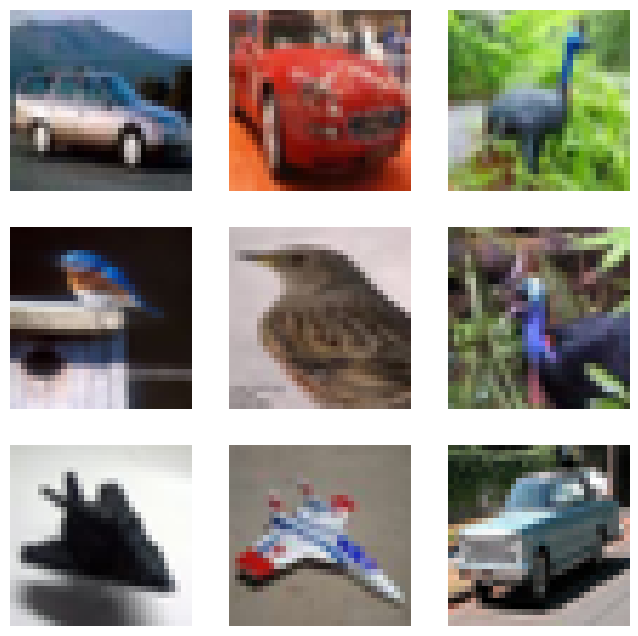

In [2]:
 # labels
num_classes=3

#load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_rows, img_cols , channels = 32,32,3

# REDUCE THE SIZE OF TRAINING SAMPLE TO 10 000 events
x_train = x_train[0:10000]
y_train = y_train[0:10000]

# take some labels only
x_train = x_train[np.where(y_train.reshape(-1)<num_classes)]
y_train = y_train[np.where(y_train.reshape(-1)<num_classes)]
x_test = x_test[np.where(y_test.reshape(-1)<num_classes)]
y_test = y_test[np.where(y_test.reshape(-1)<num_classes)]


# save x_test images
xx_test = x_test
yy_test = y_test

fig = plt.figure(figsize=(8, 8))
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.axis('off')
    plt.imshow(x_train[i])
plt.show()

In [3]:
#reshape into images
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
input_shape = (img_rows, img_cols, 1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (3011, 32, 32, 3)
3011 train samples
3000 test samples


In [4]:
#convert integers to float; normalise and center the mean
x_train=x_train.astype("float32")  
x_test=x_test.astype("float32")
mean=np.mean(x_train)
std=np.std(x_train)
x_test=(x_test-mean)/std
x_train=(x_train-mean)/std

In [5]:

print(y_train.shape)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test  = tf.keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)

(3011, 1)
(3011, 3)


# Data augmentation

In [6]:
# set up image augmentation
datagen = ImageDataGenerator( 
    rotation_range=30,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.25
    )
datagen.fit(x_train)

In [7]:
# build and compile the model  (roughly following the VGG paper)

#reg=l2(1e-4)   # L2 or "ridge" regularisation
reg=None
num_filters=16 #32
ac='relu'
adm=tf.keras.optimizers.legacy.Adam(learning_rate=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt=adm
drop_dense=0.5
drop_conv=0



## **Regular convolutional network**

In [8]:


model = Sequential()

model.add(Conv2D(num_filters, (3, 3), activation=ac, kernel_regularizer=reg, input_shape=(img_rows, img_cols, channels),padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model.add(Dropout(drop_conv))

model.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model.add(Dropout(drop_conv))

model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model.add(Dropout(drop_conv))

model.add(Flatten())
model.add(Dense(512, activation=ac,kernel_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)


## **Pretrained network Xception**

https://keras.io/api/applications/

In [9]:
'''
base_model = k.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(128, 128 , channels),
    include_top=False)  # Do not include the ImageNet classifier at the top.

# Freeze base model
base_model.trainable = False

# Create new model on top.
inputs = k.Input(shape=(32, 32, 3))
# upsampling to get 32x32 -> 128x128
upsamp1 = tf.keras.layers.UpSampling2D((2,2))(inputs)
upsamp2 = tf.keras.layers.UpSampling2D((2,2))(upsamp1)
x = base_model(upsamp2, training=False)

# Dense layers to be trained
x = k.layers.Flatten()(x)
x = k.layers.Dense(128, activation=ac,kernel_regularizer=reg)(x)
x = k.layers.BatchNormalization()(x)
x = k.layers.Dropout(drop_dense)(x)
outputs = k.layers.Dense(num_classes, activation='softmax')(x)

model = k.Model(inputs, outputs)

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)
'''

"\nbase_model = k.applications.Xception(\n    weights='imagenet',  # Load weights pre-trained on ImageNet.\n    input_shape=(128, 128 , channels),\n    include_top=False)  # Do not include the ImageNet classifier at the top.\n\n# Freeze base model\nbase_model.trainable = False\n\n# Create new model on top.\ninputs = k.Input(shape=(32, 32, 3))\n# upsampling to get 32x32 -> 128x128\nupsamp1 = tf.keras.layers.UpSampling2D((2,2))(inputs)\nupsamp2 = tf.keras.layers.UpSampling2D((2,2))(upsamp1)\nx = base_model(upsamp2, training=False)\n\n# Dense layers to be trained\nx = k.layers.Flatten()(x)\nx = k.layers.Dense(128, activation=ac,kernel_regularizer=reg)(x)\nx = k.layers.BatchNormalization()(x)\nx = k.layers.Dropout(drop_dense)(x)\noutputs = k.layers.Dense(num_classes, activation='softmax')(x)\n\nmodel = k.Model(inputs, outputs)\n\nmodel.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)\n"

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                        

#**Training with augmentation**

In [11]:

# training without augmentation
#history=model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

# train with image augmentation   steps_per_epoch = len(x_train) / 128, 
history=model.fit(datagen.flow(x_train, y_train, batch_size=128),
                     epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
24/24 [==============================] - 14s 271ms/step - loss: 1.3026 - accuracy: 0.5928 - val_loss: 1.1167 - val_accuracy: 0.4430
Epoch 2/10
24/24 [==============================] - 2s 78ms/step - loss: 0.9261 - accuracy: 0.6676 - val_loss: 1.2890 - val_accuracy: 0.4810
Epoch 3/10
24/24 [==============================] - 2s 76ms/step - loss: 0.8332 - accuracy: 0.7014 - val_loss: 1.4845 - val_accuracy: 0.4837
Epoch 4/10
24/24 [==============================] - 2s 103ms/step - loss: 0.8001 - accuracy: 0.6991 - val_loss: 1.5006 - val_accuracy: 0.5267
Epoch 5/10
24/24 [==============================] - 2s 93ms/step - loss: 0.7216 - accuracy: 0.7250 - val_loss: 1.6416 - val_accuracy: 0.4990
Epoch 6/10
24/24 [==============================] - 2s 78ms/step - loss: 0.6597 - accuracy: 0.7409 - val_loss: 1.7555 - val_accuracy: 0.4757
Epoch 7/10
24/24 [==============================] - 2s 79ms/step - loss: 0.6497 - accuracy: 0.7449 - val_loss: 1.4875 - val_accuracy: 0.4773
Epoch 8/10

In [12]:
#training accuracy without dropout
train_acc=model.evaluate(x_train,y_train,batch_size=128)
train_acc

24/24 [==============================] - 0s 7ms/step - loss: 1.0596 - accuracy: 0.6174


[1.0595940351486206, 0.6174028515815735]

In [13]:
# plotting helper function
def plothist(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

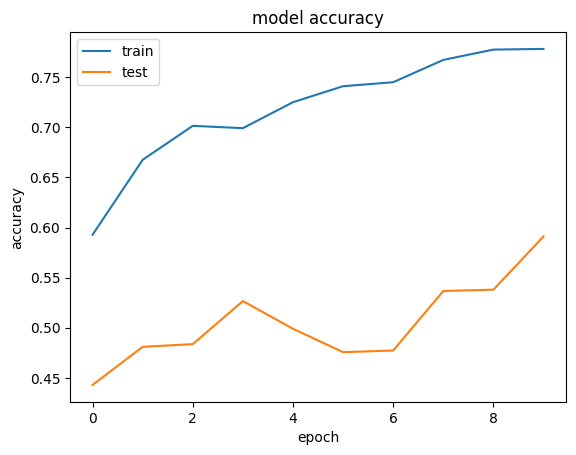

In [14]:
plothist(history)

##<font color = 'red'> **Transfer learning significantly improves our results!**

# <font color='green'> **Reinforcement learning**

##**Definition**
Reinforcement Learning (RL) is the science of decision making. It is about learning the optimal behavior in an environment to obtain maximum reward. This optimal behavior is learned through interactions with the environment and observations of how it responds, similar to children exploring the world around them and learning the actions that help them achieve a goal.

In the absence of a supervisor, the learner must independently discover the sequence of actions that maximize the reward. This discovery process is akin to a trial-and-error search. The quality of actions is measured by not just the immediate reward they return, but also the delayed reward they might fetch. As it can learn the actions that result in eventual success in an unseen environment without the help of a supervisor, reinforcement learning is a very powerful algorithm.

##**How Does Reinforcement Learning Work?**
The Reinforcement Learning problem involves an agent exploring an unknown environment to achieve a goal. RL is based on the hypothesis that all goals can be described by the maximization of expected cumulative reward. The agent must learn to sense and perturb the state of the environment using its actions to derive maximal reward. The formal framework for RL borrows from the problem of optimal control of Markov Decision Processes (MDP).

The main elements of an RL system are:

1. The agent or the learner
2. The environment the agent interacts with
3. The policy that the agent follows to take actions
4. The reward signal that the agent observes upon taking actions

A useful abstraction of the reward signal is the value function, which faithfully captures the ‘goodness’ of a state. While the reward signal represents the immediate benefit of being in a certain state, the value function captures the cumulative reward that is expected to be collected from that state on, going into the future. The objective of an RL algorithm is to discover the action policy that maximizes the average value that it can extract from every state of the system.

<img src='https://images.synopsys.com/is/image/synopsys/reinforcement-learningV1-02?qlt=82&wid=1200&ts=1680107783898&$responsive$&fit=constrain&dpr=off' width=500px>

## **Examples of Reinforcement Learning**
Any real-world problem where an agent must interact with an uncertain environment to meet a specific goal is a potential application of RL. Here are a few RL success stories:

1. **Robotics.** Robots with pre-programmed behavior are useful in structured environments, such as the assembly line of an automobile manufacturing plant, where the task is repetitive in nature. In the real world, where the response of the environment to the behavior of the robot is uncertain, pre-programming accurate actions is nearly impossible. In such scenarios, RL provides an efficient way to build general-purpose robots. It has been successfully applied to robotic path planning, where a robot must find a short, smooth, and navigable path between two locations, void of collisions and compatible with the dynamics of the robot.

2. **AlphaGo.** One of the most complex strategic games is a 3,000-year-old Chinese board game called Go. Its complexity stems from the fact that there are 10^270 possible board combinations, several orders of magnitude more than the game of chess. In 2016, an RL-based Go agent called AlphaGo defeated the greatest human Go player. Much like a human player, it learned by experience, playing thousands of games with professional players. The latest RL-based Go agent has the capability to learn by playing against itself, an advantage that the human player doesn’t have.

3. **Autonomous Driving.** An autonomous driving system must perform multiple perception and planning tasks in an uncertain environment. Some specific tasks where RL finds application include vehicle path planning and motion prediction. Vehicle path planning requires several low and high-level policies to make decisions over varying temporal and spatial scales. Motion prediction is the task of predicting the movement of pedestrians and other vehicles, to understand how the situation might develop based on the current state of the environment.

<h2><strong>How Actor-Critic works:</strong></h2>
<p>Imagine you play a video game with a friend that provides you some feedback. You're the Actor, and your friend is the Critic:</p>
<p><img class="img-fluid" style="display: block; margin-left: auto; margin-right: auto;" src="https://pylessons.com/media/Tutorials/Reinforcement-learning-tutorial/A2C-reinforcement-learning/09_A2C-reinforcement-learning.png" alt="" width="949" height="534" />In the beginning, you don't know how to play, so you try some action randomly. The Critic observes your action and provides feedback. 
<p>In the Actor-Critic Methods:</p>
<ul>
<li>The "Critic" estimates the value function. This could be the action-value (the Q value) or state-value (the V value).</li>
<li>Critic: Q-learning algorithm that critiques the action that the Actor selected, providing feedback on how to adjust. It can take advantage of efficiency tricks in Q-learning, such as memory replay.</li>
</ul>
<p>We update both the Critic network and the Value network at each update step.</p>
<p>Intuitively, this means how better it is to take a specific action than the average general action at the given state. So, using the Value function as the baseline function, we subtract the Q value term with the Value. 

# Actor Critic Method

**Author:** [Apoorv Nandan](https://twitter.com/NandanApoorv)<br>
Modified by Marcin Wolter<br>
**Date created:** 2020/05/13<br>
**Last modified:** 2023/04/16<br>
**Description:** Implement Actor Critic Method in CartPole environment.

## Introduction

This script shows an implementation of Actor Critic method on CartPole-V0 environment.

### Actor Critic Method

As an agent takes actions and moves through an environment, it learns to map
the observed state of the environment to two possible outputs:

1. Recommended action: A probability value for each action in the action space.
   The part of the agent responsible for this output is called the **actor**.
2. Estimated rewards in the future: Sum of all rewards it expects to receive in the
   future. The part of the agent responsible for this output is the **critic**.

Agent and Critic learn to perform their tasks, such that the recommended actions
from the actor maximize the rewards.

### CartPole-V1

A pole is attached to a cart placed on a frictionless track. The agent has to apply
force to move the cart. It is rewarded for every time step the pole
remains upright. The agent, therefore, must learn to keep the pole from falling over.

### References

- [CartPole](http://www.derongliu.org/adp/adp-cdrom/Barto1983.pdf)
- [CartPole in GYM](https://www.gymlibrary.dev/environments/classic_control/cart_pole/ )
- [Actor Critic Method](https://hal.inria.fr/hal-00840470/document)


# **Cart Pole**
<figure class="align-default" id="id1">
<a class="reference internal image-reference" href="https://www.gymlibrary.dev/_images/cart_pole.gif"><img alt="https://www.gymlibrary.dev/_images/cart_pole.gif" src="https://www.gymlibrary.dev/_images/cart_pole.gif" style="width: 200px;" /></a>
</figure>
<p>This environment is part of the <a href='..'>Classic Control environments</a>. Please read that page first for general information.</p>
<div class="table-wrapper colwidths-auto docutils container">
<table class="docutils align-default">
<thead>
<tr class="row-odd"><th class="head"><p></p></th>
<th class="head"><p></p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>Action Space</p></td>
<td><p>Discrete(2)</p></td>
</tr>
<tr class="row-odd"><td><p>Observation Shape</p></td>
<td><p>(4,)</p></td>
</tr>
<tr class="row-even"><td><p>Observation High</p></td>
<td><p>[4.8   inf 0.42  inf]</p></td>
</tr>
<tr class="row-odd"><td><p>Observation Low</p></td>
<td><p>[-4.8   -inf -0.42  -inf]</p></td>
</tr>
<tr class="row-even"><td><p>Import</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">gym.make(&quot;CartPole-v1&quot;)</span></code></p></td>
</tr>
</tbody>
</table>
</div>
<section id="description">
<h2>Description<a class="headerlink" href="#description" title="Permalink to this heading">#</a></h2>
<p>This environment corresponds to the version of the cart-pole problem described by Barto, Sutton, and Anderson in
<a class="reference external" href="https://ieeexplore.ieee.org/document/6313077">“Neuronlike Adaptive Elements That Can Solve Difficult Learning Control Problem”</a>.
A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track.
The pendulum is placed upright on the cart and the goal is to balance the pole by applying forces
in the left and right direction on the cart.</p>
</section>
<section id="action-space">
<h2>Action Space<a class="headerlink" href="#action-space" title="Permalink to this heading">#</a></h2>
<p>The action is a <code class="docutils literal notranslate"><span class="pre">ndarray</span></code> with shape <code class="docutils literal notranslate"><span class="pre">(1,)</span></code> which can take values <code class="docutils literal notranslate"><span class="pre">{0,</span> <span class="pre">1}</span></code> indicating the direction
of the fixed force the cart is pushed with.</p>
<div class="table-wrapper colwidths-auto docutils container">
<table class="docutils align-default">
<thead>
<tr class="row-odd"><th class="head"><p>Num</p></th>
<th class="head"><p>Action</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>0</p></td>
<td><p>Push cart to the left</p></td>
</tr>
<tr class="row-odd"><td><p>1</p></td>
<td><p>Push cart to the right</p></td>
</tr>
</tbody>
</table>
</div>
<p><strong>Note</strong>: The velocity that is reduced or increased by the applied force is not fixed and it depends on the angle
the pole is pointing. The center of gravity of the pole varies the amount of energy needed to move the cart underneath it</p>
</section>
<section id="observation-space">
<h2>Observation Space<a class="headerlink" href="#observation-space" title="Permalink to this heading">#</a></h2>
<p>The observation is a <code class="docutils literal notranslate"><span class="pre">ndarray</span></code> with shape <code class="docutils literal notranslate"><span class="pre">(4,)</span></code> with the values corresponding to the following positions and velocities:</p>
<div class="table-wrapper colwidths-auto docutils container">
<table class="docutils align-default">
<thead>
<tr class="row-odd"><th class="head"><p>Num</p></th>
<th class="head"><p>Observation</p></th>
<th class="head"><p>Min</p></th>
<th class="head"><p>Max</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>0</p></td>
<td><p>Cart Position</p></td>
<td><p>-4.8</p></td>
<td><p>4.8</p></td>
</tr>
<tr class="row-odd"><td><p>1</p></td>
<td><p>Cart Velocity</p></td>
<td><p>-Inf</p></td>
<td><p>Inf</p></td>
</tr>
<tr class="row-even"><td><p>2</p></td>
<td><p>Pole Angle</p></td>
<td><p>~ -0.418 rad (-24°)</p></td>
<td><p>~ 0.418 rad (24°)</p></td>
</tr>
<tr class="row-odd"><td><p>3</p></td>
<td><p>Pole Angular Velocity</p></td>
<td><p>-Inf</p></td>
<td><p>Inf</p></td>
</tr>
</tbody>
</table>
</div>
<p><strong>Note:</strong> While the ranges above denote the possible values for observation space of each element,
it is not reflective of the allowed values of the state space in an unterminated episode. Particularly:</p>
<ul class="simple">
<li><p>The cart x-position (index 0) can be take values between <code class="docutils literal notranslate"><span class="pre">(-4.8,</span> <span class="pre">4.8)</span></code>, but the episode terminates
if the cart leaves the <code class="docutils literal notranslate"><span class="pre">(-2.4,</span> <span class="pre">2.4)</span></code> range.</p></li>
<li><p>The pole angle can be observed between  <code class="docutils literal notranslate"><span class="pre">(-.418,</span> <span class="pre">.418)</span></code> radians (or <strong>±24°</strong>), but the episode terminates
if the pole angle is not in the range <code class="docutils literal notranslate"><span class="pre">(-.2095,</span> <span class="pre">.2095)</span></code> (or <strong>±12°</strong>)</p></li>
</ul>
</section>
<section id="rewards">
<h2>Rewards<a class="headerlink" href="#rewards" title="Permalink to this heading">#</a></h2>
<p>Since the goal is to keep the pole upright for as long as possible, a reward of <code class="docutils literal notranslate"><span class="pre">+1</span></code> for every step taken,
including the termination step, is allotted. The threshold for rewards is 475 for v1.</p>
</section>
<section id="starting-state">
<h2>Starting State<a class="headerlink" href="#starting-state" title="Permalink to this heading">#</a></h2>
<p>All observations are assigned a uniformly random value in <code class="docutils literal notranslate"><span class="pre">(-0.05,</span> <span class="pre">0.05)</span></code></p>
</section>
<section id="episode-end">
<h2>Episode End<a class="headerlink" href="#episode-end" title="Permalink to this heading">#</a></h2>
<p>The episode ends if any one of the following occurs:</p>
<ol class="arabic simple">
<li><p>Termination: Pole Angle is greater than ±12°</p></li>
<li><p>Termination: Cart Position is greater than ±2.4 (center of the cart reaches the edge of the display)</p></li>
<li><p>Truncation: Episode length is greater than 500 (200 for v0)</p></li>
</ol>
</section>
<section id="arguments">
<h2>Arguments<a class="headerlink" href="#arguments" title="Permalink to this heading">#</a></h2>
<div class="highlight-default notranslate"><div class="highlight"><pre><span></span><span class="n">gym</span><span class="o">.</span><span class="n">make</span><span class="p">(</span><span class="s1">&#39;CartPole-v1&#39;</span><span class="p">)</span>
</pre></div>
</div>
<p>No additional arguments are currently supported.</p>
</section>
</section>

## Setup


In [15]:
import gym
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from gym import wrappers
from gym.wrappers.record_video import RecordVideo
import os
import matplotlib.pyplot as plt
from IPython import display


In [16]:

# Configuration parameters for the whole setup
seed = 42
gamma = 0.99  # Discount factor for past rewards
max_steps_per_episode = 10000
env = gym.make("CartPole-v1")  # Create the environment  , render_mode='rgb_array'
env.reset(seed=seed)
eps = np.finfo(np.float32).eps.item()  # Smallest number such that 1.0 + eps != 1.0


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


## Implement Actor Critic network

This network learns two functions:

1. Actor: This takes as input the state of our environment and returns a
probability value for each action in its action space.
2. Critic: This takes as input the state of our environment and returns
an estimate of total rewards in the future.

In our implementation, they share the initial layer.


In [17]:
num_inputs = 4    # four parameters describing the cart state
num_actions = 2   # move the cart left or right
num_hidden = 128

inputs = layers.Input(shape=(num_inputs,))
common = layers.Dense(num_hidden, activation="relu")(inputs)
action = layers.Dense(num_actions, activation="softmax")(common)
critic = layers.Dense(1)(common)

model = keras.Model(inputs=inputs, outputs=[action, critic])


In [18]:
def make_video(i, env, model):

    video = VideoRecorder(env, 'final_'+str(i)+'.mp4')

    steps = 0
    done = False
    state = env.reset()
    while not done:
        env.render(mode='rgb_array')
        video.capture_frame()
        # Predict action probabilities and estimated future rewards
        # from environment state
        state = tf.convert_to_tensor(state)
        state = tf.expand_dims(state, 0)
        action_probs, critic_value = model(state)   
        # Sample action from action probability distribution
        action = np.random.choice(num_actions, p=np.squeeze(action_probs))     
        state, reward, done, _ = env.step(action)
        steps += 1
        
    print("Testing steps: {}: ".format(steps))
    video.close()


## Train


In [19]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)
huber_loss = keras.losses.Huber()
action_probs_history = []
critic_value_history = []
rewards_history = []
running_reward = 0
episode_count = 0

from gym.wrappers.monitoring.video_recorder import VideoRecorder
video = VideoRecorder(env, 'training.mp4')
while True:  # Run until solved

    state = env.reset()

    episode_reward = 0
    with tf.GradientTape() as tape:
        for timestep in range(1, max_steps_per_episode):
            # env.render(); Adding this line would show the attempts
            # of the agent in a pop up window.
            env.render(mode='rgb_array') 
            video.capture_frame()  # capture the video frame
            
            state = tf.convert_to_tensor(state)
            state = tf.expand_dims(state, 0)

            # Predict action probabilities and estimated future rewards
            # from environment state
            action_probs, critic_value = model(state)
            critic_value_history.append(critic_value[0, 0])

            # Sample action from action probability distribution
            action = np.random.choice(num_actions, p=np.squeeze(action_probs))
            action_probs_history.append(tf.math.log(action_probs[0, action]))

            # Apply the sampled action in our environment
            state, reward, done, _ = env.step(action)
            rewards_history.append(reward)
            episode_reward += reward

            if done:
                break

        # Update running reward to check condition for solving
        running_reward = 0.05 * episode_reward + (1 - 0.05) * running_reward

        # Calculate expected value from rewards
        # - At each timestep what was the total reward received after that timestep
        # - Rewards in the past are discounted by multiplying them with gamma
        # - These are the labels for our critic
        returns = []
        discounted_sum = 0
        for r in rewards_history[::-1]:
            discounted_sum = r + gamma * discounted_sum
            returns.insert(0, discounted_sum)

        # Normalize
        returns = np.array(returns)
        returns = (returns - np.mean(returns)) / (np.std(returns) + eps)
        returns = returns.tolist()

        # Calculating loss values to update our network
        history = zip(action_probs_history, critic_value_history, returns)
        actor_losses = []
        critic_losses = []
        for log_prob, value, ret in history:
            # At this point in history, the critic estimated that we would get a
            # total reward = `value` in the future. We took an action with log probability
            # of `log_prob` and ended up recieving a total reward = `ret`.
            # The actor must be updated so that it predicts an action that leads to
            # high rewards (compared to critic's estimate) with high probability.
            diff = ret - value
            actor_losses.append(-log_prob * diff)  # actor loss

            # The critic must be updated so that it predicts a better estimate of
            # the future rewards.
            critic_losses.append(
                huber_loss(tf.expand_dims(value, 0), tf.expand_dims(ret, 0))
            )

        # Backpropagation
        loss_value = sum(actor_losses) + sum(critic_losses)
        grads = tape.gradient(loss_value, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        # Clear the loss and reward history
        action_probs_history.clear()
        critic_value_history.clear()
        rewards_history.clear()

    # Log details
    episode_count += 1
    if episode_count % 10 == 0:
        template = "running reward: {:.2f} at episode {}"
        print(template.format(running_reward, episode_count))

        make_video(episode_count, env, model)


    if running_reward > 195: # 195:  # Condition to consider the task solved
        print("Solved at episode {}!".format(episode_count))
        video.close()
        break

 


/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See h

running reward: 9.62 at episode 10


/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Testing steps: 14: 
running reward: 16.37 at episode 20


/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Testing steps: 14: 
running reward: 19.03 at episode 30


/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Testing steps: 20: 
running reward: 22.78 at episode 40


/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Testing steps: 30: 
running reward: 24.49 at episode 50


/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Testing steps: 16: 
running reward: 25.88 at episode 60


/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Testing steps: 19: 
running reward: 29.25 at episode 70


/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Testing steps: 13: 
running reward: 32.41 at episode 80


/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Testing steps: 35: 
running reward: 47.15 at episode 90


/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Testing steps: 76: 
running reward: 47.40 at episode 100


/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Testing steps: 93: 
running reward: 56.11 at episode 110


/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Testing steps: 27: 
running reward: 79.09 at episode 120


/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Testing steps: 74: 
running reward: 98.46 at episode 130


/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Testing steps: 124: 
running reward: 109.40 at episode 140


/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Testing steps: 124: 
running reward: 101.73 at episode 150


/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Testing steps: 129: 
running reward: 113.95 at episode 160


/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Testing steps: 119: 
running reward: 128.71 at episode 170


/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Testing steps: 196: 
running reward: 162.43 at episode 180


/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Testing steps: 213: 
running reward: 162.58 at episode 190


/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Testing steps: 116: 
running reward: 138.09 at episode 200


/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Testing steps: 85: 
running reward: 138.88 at episode 210


/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Testing steps: 177: 
running reward: 164.77 at episode 220


/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Testing steps: 270: 
Solved at episode 225!


### **Record video after training** 

In [20]:
make_video(episode_count, env, model) 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method 

Testing steps: 500: 


# **So, we have trained the robot!!!**

###**Film showing the robot training**

[![Blinking LEDs](http://img.youtube.com/vi/n2gE7n11h1Y/0.jpg)](https://www.youtube.com/watch?v=n2gE7n11h1Y "Blinking LEDs")

# <font color='green'> **Autoencoders**

An autoencoder is a type of artificial neural network used to learn efficient codings of unlabeled data (unsupervised learning). An autoencoder learns two functions: an encoding function that transforms the input data, and a decoding function that recreates the input data from the encoded representation. The autoencoder learns an efficient representation (encoding) for a set of data, typically for dimensionality reduction.

<img src='https://stackabuse.s3.amazonaws.com/media/image-reconstruction-and-denoising-with-autoencoders-in-python-and-keras-3.png' width=500px>

# **Simple autoencoder**

In [21]:
from keras.datasets import mnist
import numpy as np
np.random.seed(10)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
from time import time
import numpy as np
import keras.backend as K
from tensorflow.python.keras.layers import Layer, InputSpec
from keras.layers import Dense, Input, Dropout
from keras.models import Model
from tensorflow.keras.optimizers import SGD
from keras import callbacks
from keras.initializers import VarianceScaling
from sklearn.cluster import KMeans
import sklearn.metrics



# Read MNIST data

In [23]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
x_train = x_train / 255.
x_test = x_test / 255.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Hyperparameters

In [24]:
encoding_dim = 2
batch_size = 128
epochs = 200

 # Build autoencoder



In [25]:


# This is our input image
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)
#encoded = Dropout(0.2)(encoded)
encoded = Dense(encoding_dim, activation='linear')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(256, activation='relu')(encoded)
decoded = Dense(512, activation='relu')(decoded)
#decoded = Dropout(0.2)(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 2)                 514       
                                                                 
 dense_8 (Dense)             (None, 256)               768       
                                                                 
 dense_9 (Dense)             (None, 512)               131584    
                                                                 
 dense_10 (Dense)            (None, 784)               4021

# Train the autoencoder

In [26]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(x_train, x_train, batch_size=batch_size, epochs=epochs)

Epoch 1/200
469/469 [==============================] - 5s 5ms/step - loss: 0.2310
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1959
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1875
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1831
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1801
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1779
Epoch 7/200
469/469 [==============================] - 2s 5ms/step - loss: 0.1763
Epoch 8/200
469/469 [==============================] - 2s 5ms/step - loss: 0.1747
Epoch 9/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1735
Epoch 10/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1724
Epoch 11/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1717
Epoch 12/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1708
Epoch 13/200


# Plot history

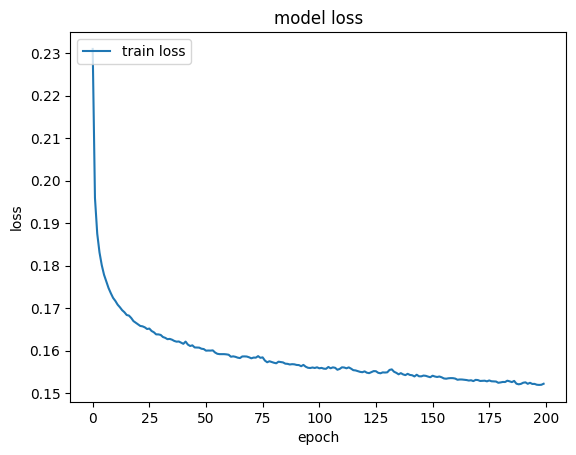

In [27]:
# summarize history for loss
import matplotlib.pyplot as plt

print(history)
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss'], loc='upper left')
plt.show()

# Plot clusters

313/313 [==============================] - 0s 1ms/step
(10000, 2)


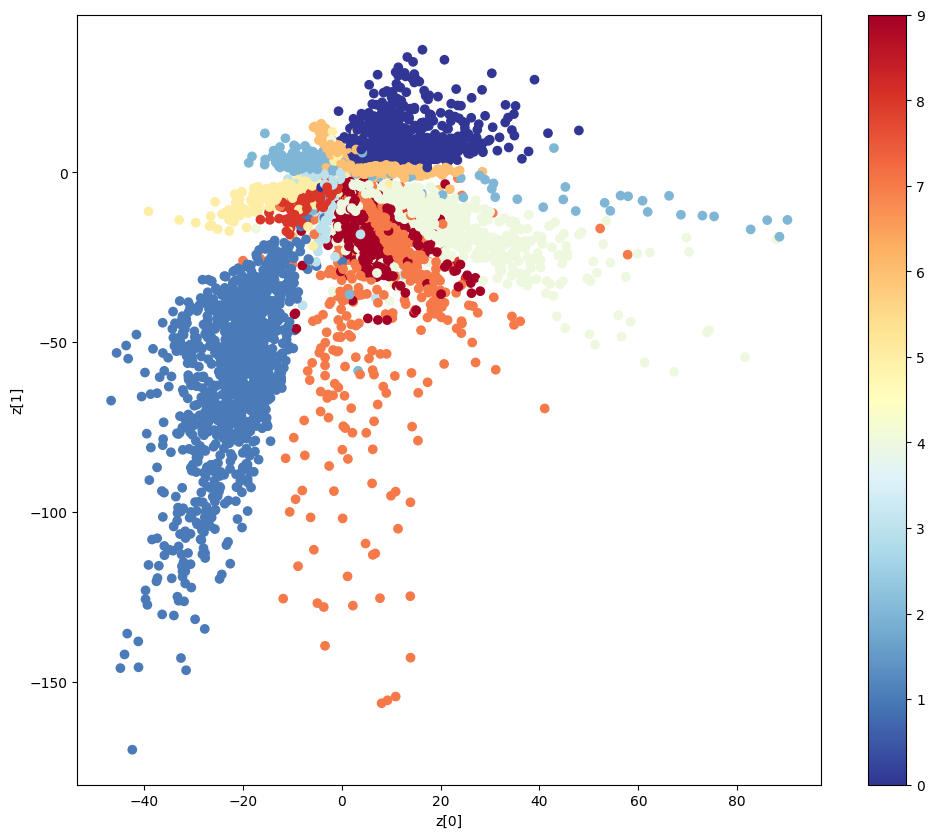

In [28]:
import matplotlib.pyplot as plt

def plot_label_clusters(encoded, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z = encoder.predict(data.reshape(len(data),784))
    print(z.shape)
    plt.figure(figsize=(12, 10))
    plt.scatter(z[:, 0], z[:, 1], c=labels, cmap="RdYlBu_r")
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()




plot_label_clusters(encoded, x_test, y_test)

# Plot digits

313/313 [==============================] - 1s 2ms/step


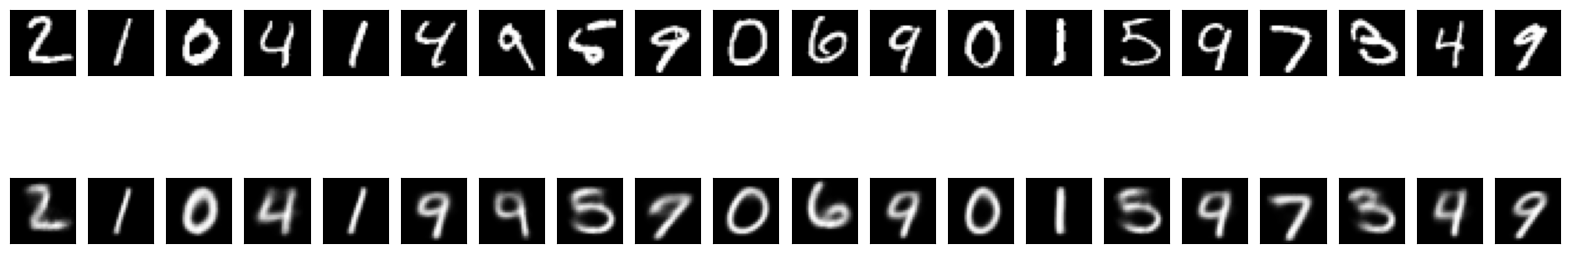

In [29]:
decoded_imgs = autoencoder.predict(x_test)

n = 20
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# **What else could we do with autoencoders?**

### For example: image denoising.


# Convolutional autoencoder for image denoising

**Author:** [Santiago L. Valdarrama](https://twitter.com/svpino)<br>
Slightly modified by M.W.
**Date created:** 2021/03/01<br>
**Last modified:** 2023/04/17<br>
**Description:** How to train a deep convolutional autoencoder for image denoising.

## Introduction

This example demonstrates how to implement a deep convolutional autoencoder
for image denoising, mapping noisy digits images from the MNIST dataset to
clean digits images. This implementation is based on an original blog post
titled [Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)
by [François Chollet](https://twitter.com/fchollet).

## Setup

In [30]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model


def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


## Prepare the data

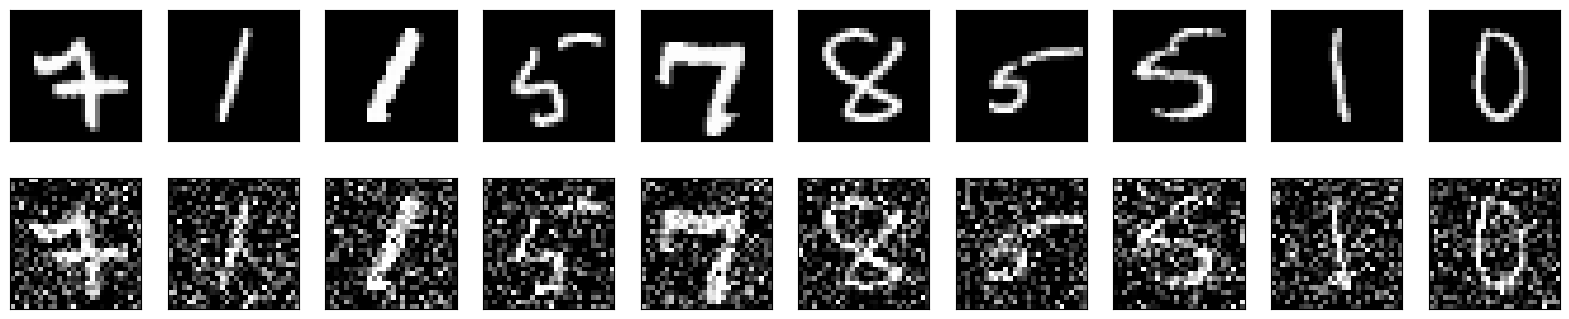

In [31]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

## Build the autoencoder

We are going to use the Functional API to build our convolutional autoencoder.

In [32]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248

Let's train the autoencoder using the noisy
data as our input and the clean data as our target. We want our autoencoder to
learn how to denoise the images.

In [33]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/20
469/469 [==============================] - 7s 9ms/step - loss: 0.1816 - val_loss: 0.1055
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1020 - val_loss: 0.0983
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0977 - val_loss: 0.0955
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0953 - val_loss: 0.0937
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0938 - val_loss: 0.0926
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0918 - val_loss: 0.0913
Epoch 8/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0911 - val_loss: 0.0902
Epoch 9/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0905 - val_loss: 0.0895
Epoch 10/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0900 - val_loss: 0.0891

Let's now predict on the noisy data and display the results of our autoencoder.

Notice how the autoencoder does an amazing job at removing the noise from the
input images.

313/313 [==============================] - 1s 2ms/step


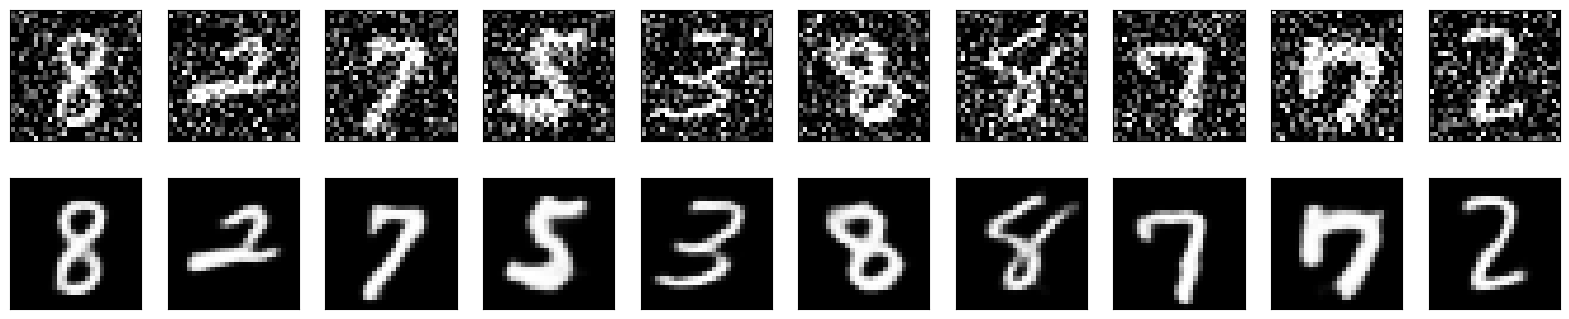

In [34]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)

<iframe width="560" height="315" src="https://www.youtube.com/embed/n2gE7n11h1Y" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

#<font color='green'> **Summary:**

* We have learned about new methods:

  * Transfer learning 
  * Reinforcement learning
  * Autoencoders

* **There are many other Machine Learning techniques like:**
  * Bayesian Neural Networks and Mixture Density Networks MDN returning the probability distribution,
  * Language processing networks (small chatGPT or google translators),
  * recurent networks with memory,
  * and many, many others... 

* **Please prepare your projects!!!**  